# **Traffic Sign Recognition System**

# **Credits**
### **24L-2566 Ghulam Murtaza**
### **24L-2550 Hannan Khan**
### **24L-2539 Yousaf Iqbal**

# **About the Model**
**We are using GTSRD German traffic sign recognition dataset which is the most famous one out there. There are about 40,000 images so model training took a lot of time. Furthermore there are 43 classes meaning our model can predict 43 different types of traffic signs**

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from tqdm import tqdm
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization,InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

## **Reading all the csv files**

In [ ]:
#Load all csv files
train_df=pd.read_csv("Traffic_data/Train.csv")
test_df=pd.read_csv("Traffic_data/Test.csv")
meta_df=pd.read_csv("Traffic_data/Meta.csv")

## **A little info of the csv files**

In [ ]:
print(f"===TRAIN.CSV===")
print(f"Shape: {train_df.shape}")
print(f"Columns: {train_df.columns.tolist()}")
print(f"First 5 rows:")
train_df.head()

===TRAIN.CSV===
Shape: (39209, 8)
Columns: ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId', 'Path']
First 5 rows:


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
print(f"===TEST.CSV===")
print(f"Shape: {test_df.shape}")
print(f"Columns: {test_df.columns.tolist()}")
print(f"First 5 rows:")
test_df.head()

===TEST.CSV===
Shape: (12630, 8)
Columns: ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId', 'Path']
First 5 rows:


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
print(f"===META.CSV===")
print(f"Shape: {meta_df.shape}")
print(f"Columns: {meta_df.columns.tolist()}")
print(f"First 5 rows:")
meta_df.head()

===META.CSV===
Shape: (43, 5)
Columns: ['Path', 'ClassId', 'ShapeId', 'ColorId', 'SignId']
First 5 rows:


,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


## **Checking for null values**

In [ ]:
print("Missing values in Train.csv:")
print(train_df.isnull().sum())
print("\n")

Missing values in Train.csv:
Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64




In [ ]:
print("Missing values in Test.csv:")
print(test_df.isnull().sum())
print("\n")

Missing values in Test.csv:
Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64




In [ ]:
print("Missing values in Meta.csv:")
print(meta_df.isnull().sum())
print("\n")

Missing values in Meta.csv:
Path       0
ClassId    0
ShapeId    0
ColorId    0
SignId     1
dtype: int64




## **Filling missing values**

In [ ]:
meta_df['SignId']=meta_df['SignId'].fillna(meta_df['SignId'].mode()[0])

In [ ]:
print("Missing values in Meta.csv after filling missing values:")
print(meta_df.isnull().sum())
print("\n")

Missing values in Meta.csv after filling missing values:
Path       0
ClassId    0
ShapeId    0
ColorId    0
SignId     0
dtype: int64




## **Checking for duplicates in test and train csv files**

In [ ]:
print("Duplicate rows in Train.csv: ",train_df.duplicated().sum())
print("Duplicate rows in Test.csv: ",test_df.duplicated().sum())

Duplicate rows in Train.csv:  0
Duplicate rows in Test.csv:  0


## **Checking data types (categorical or numerical) in the csv files**

In [ ]:
print(f"==============TEST.CSV==============\n\n")
test_df.info()

==============TEST.CSV==============


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [ ]:
print(f"==============TRAIN.CSV==============\n\n")
train_df.info()

==============TRAIN.CSV==============


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [ ]:
print(f"==============META.CSV==============\n\n")
meta_df.info()

==============META.CSV==============


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   43 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


## **Conclusion**
**The data types do not need to be changed or encoded as they are already what they are meant to be**

## **EDA**
#### **Now we move on to exploratory data analysis**

### **Class Distribution Analysis**

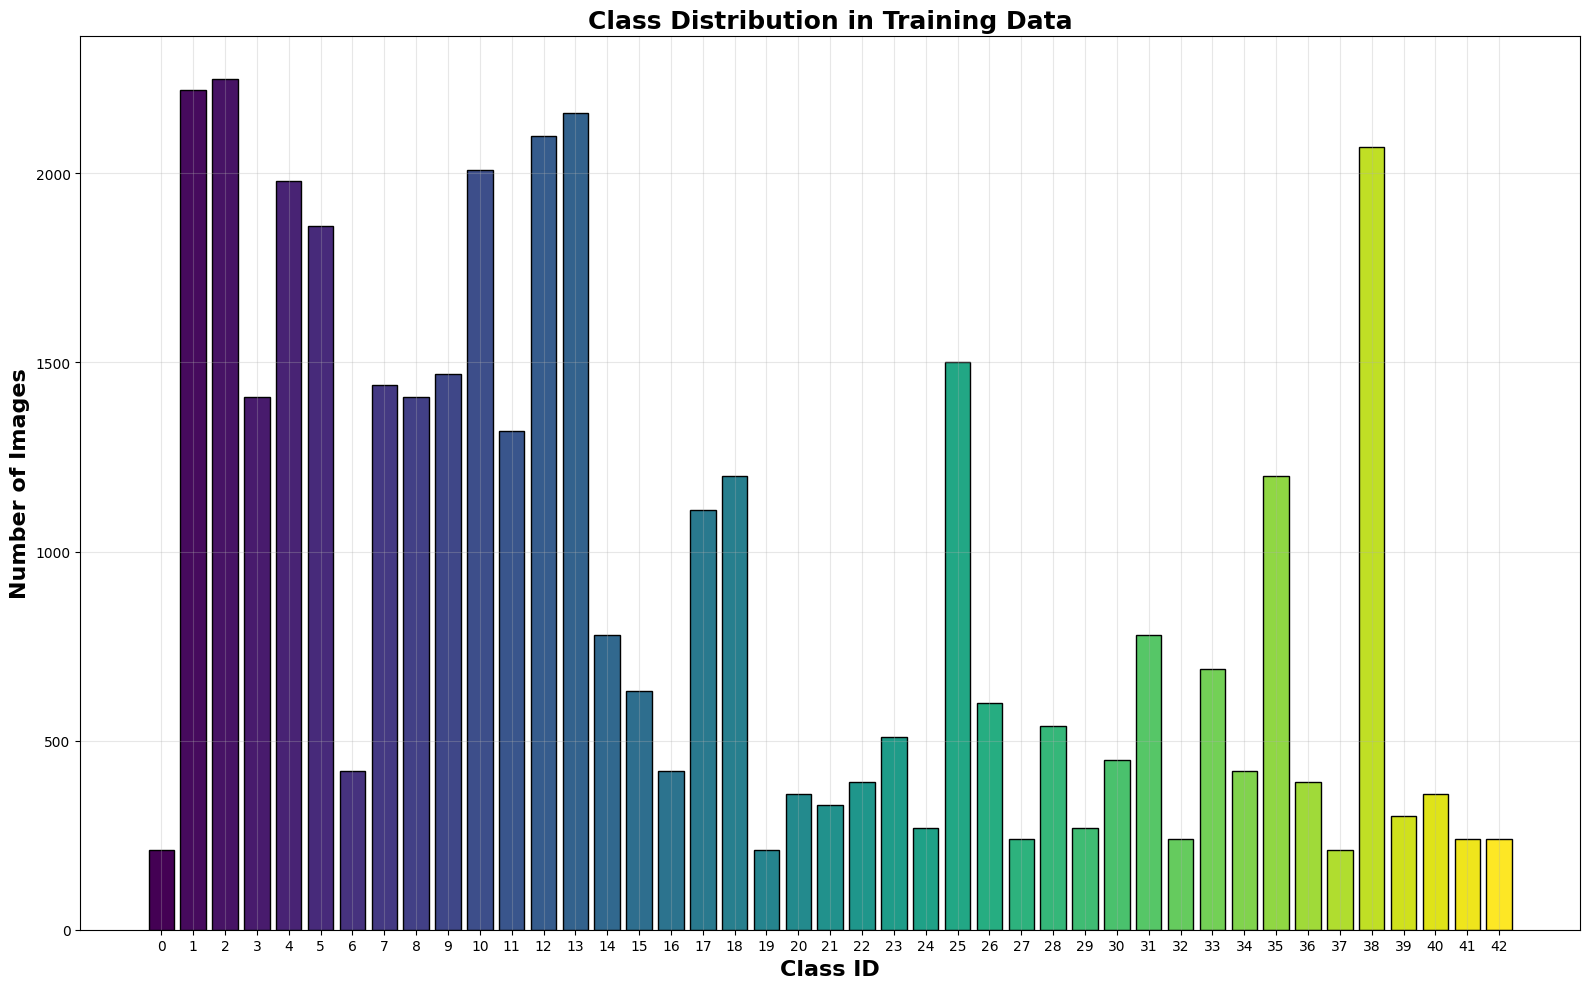

CLASS DISTRIBUTION STATS:
Total classes: 43
Total images: 39209
Average images per class: 911.8
Most common class: 2 with 2250 images
Least common class: 0 with 210 images


In [ ]:
# Class Distribution Analysis with custom colors
plt.figure(figsize=(16, 10))
class_counts = train_df["ClassId"].value_counts().sort_index()

colors = plt.cm.viridis(np.linspace(0, 1, len(class_counts)))  # Viridis color scheme

bars = plt.bar(
    class_counts.index, class_counts.values, color=colors, edgecolor="black"
)

plt.title("Class Distribution in Training Data", fontsize=18, fontweight="bold")
plt.xlabel("Class ID", fontsize=16,fontweight="bold")
plt.ylabel("Number of Images", fontsize=16,fontweight="bold")
plt.xticks(range(0, 43))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print statistics
print("CLASS DISTRIBUTION STATS:")
print(f"Total classes: {len(class_counts)}")
print(f"Total images: {class_counts.sum()}")
print(f"Average images per class: {class_counts.mean():.1f}")
print(f"Most common class: {class_counts.idxmax()} with {class_counts.max()} images")
print(f"Least common class: {class_counts.idxmin()} with {class_counts.min()} images")

##### **Above shows how many pictures are there for each type of traffic sign**

### **Image Dimensions analysis**

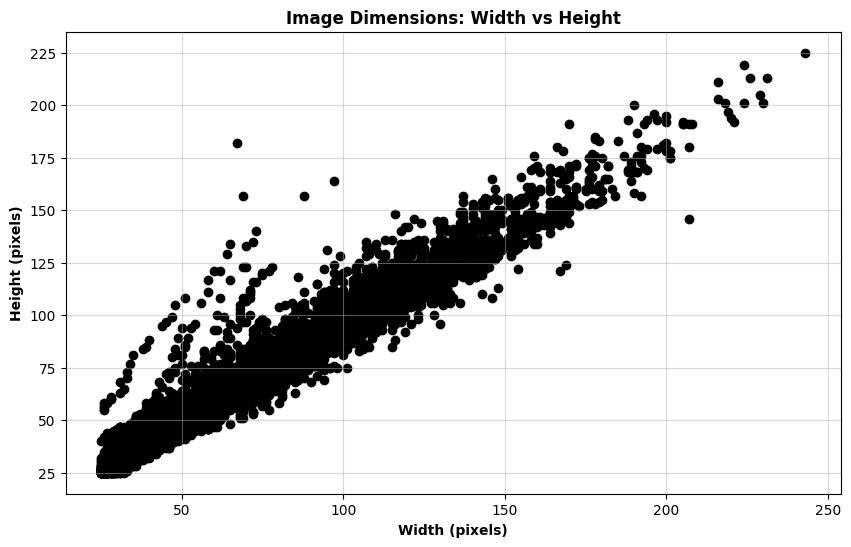

In [ ]:
# Scatter plot of Width vs Height
plt.figure(figsize=(10, 6))
plt.scatter(train_df['Width'], train_df['Height'],c='black')
plt.title('Image Dimensions: Width vs Height',fontweight="bold")
plt.xlabel('Width (pixels)',fontweight="bold")
plt.ylabel('Height (pixels)',fontweight="bold")
plt.grid(True, alpha=0.5)
plt.show()

## **What do we learn from above?**
**There is a linear relation between width and height and that too is a strong linear relation**
**This shows the natural distribution of real world traffic signs photos**
**We have a good data for training a model**

## **Checking the trend in ROI dimensions**

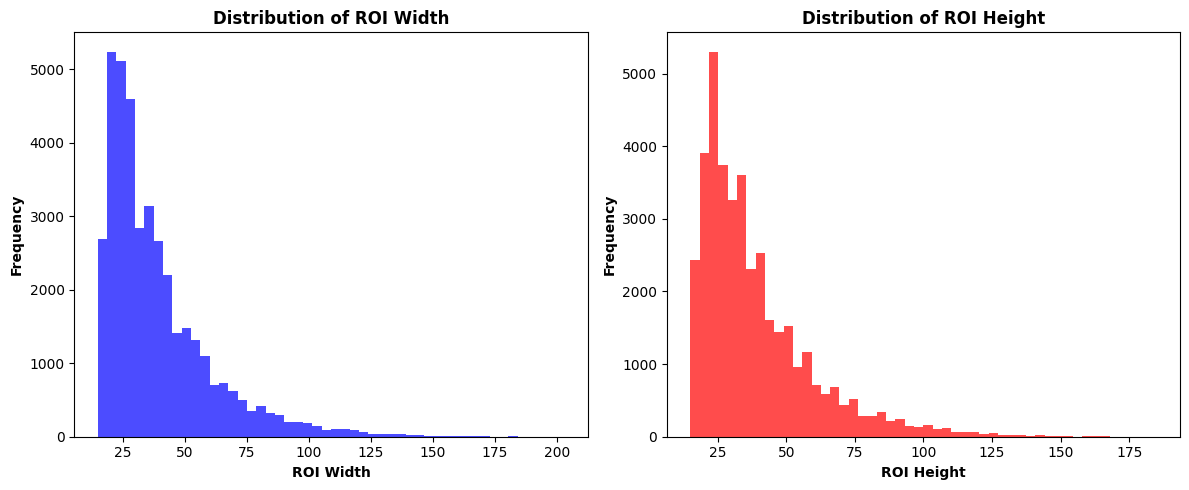

In [ ]:
train_df['ROI_Width'] = train_df['Roi.X2'] - train_df['Roi.X1']
train_df['ROI_Height'] = train_df['Roi.Y2'] - train_df['Roi.Y1']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['ROI_Width'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of ROI Width',fontweight="bold")
plt.xlabel('ROI Width',fontweight="bold")
plt.ylabel('Frequency',fontweight="bold")

plt.subplot(1, 2, 2)
plt.hist(train_df['ROI_Height'], bins=50, alpha=0.7, color='red')
plt.title('Distribution of ROI Height',fontweight="bold")
plt.xlabel('ROI Height',fontweight="bold")
plt.ylabel('Frequency',fontweight="bold")

plt.tight_layout()
plt.show()

## **Conclusion of the graphs above**

**The data of both Range of Interest Height and width is right-skewed, with most values contentrated**
**in the range 25-75 pixels**

**The data suggests that most traffic signs are small to medium sized with some large outliers, which we may preprocess later**

In [ ]:
# dropping these columns because they were created for printing above
train_df=train_df.drop(['ROI_Width','ROI_Height'],axis=1)


## **Correlation Matrices of Train, Test and Meta**

### **Train.csv**

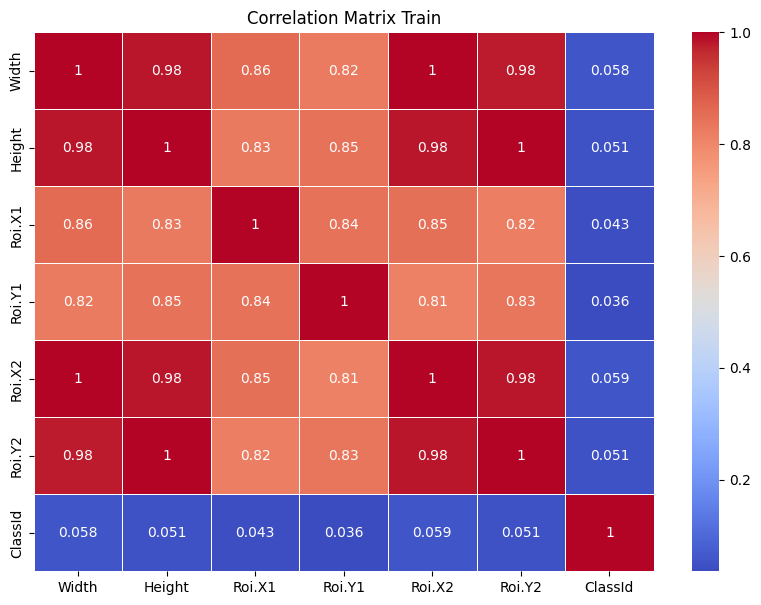

In [ ]:
corr_matrix=train_df.iloc[:,:-1].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Train")
plt.show()

## **What do we see?**
**We see how it perfectly makes sense because all the columns which are basically the dimensions of image relate with each other very much**

**All columns correlation with class ID isnt good and it makes perfect sense because what relation can there be between what sign it is and what kind of picture(dimensions) was taken**

### **Test.csv**

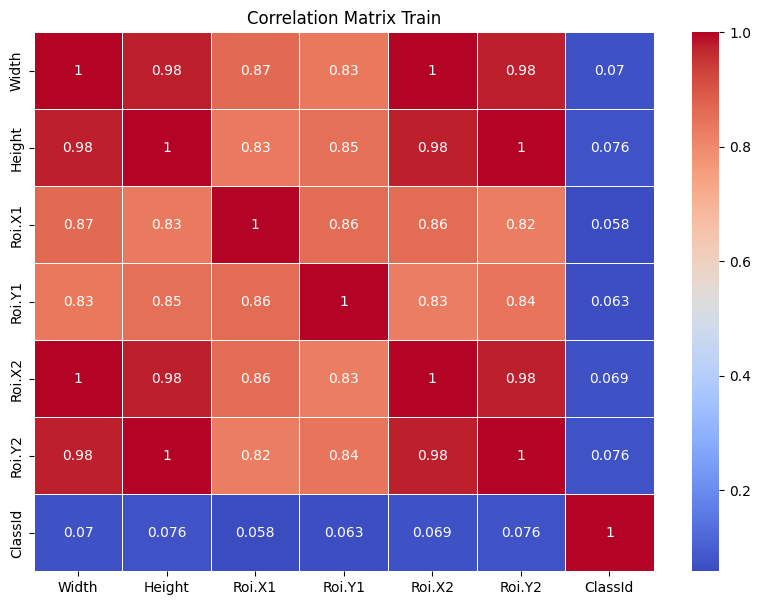

In [ ]:
corr_matrix=test_df.iloc[:,:-1].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Train")
plt.show()

## **Interpretation**
**Almost same as train.csv**

### **Meta.csv**

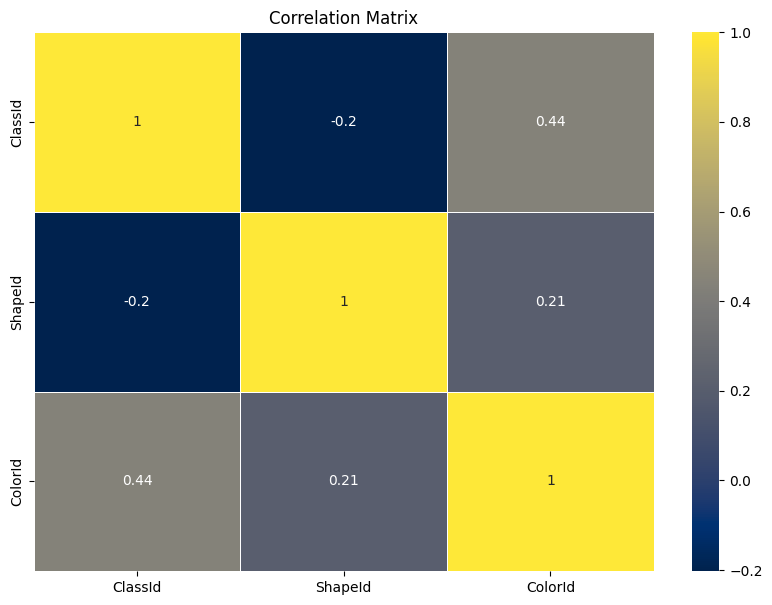

In [ ]:
corr_matrix=meta_df.iloc[:,1:-1].corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## **Kya Samjhe?**
**There isnt good corrrelation, these are just random attributes**

## **Preprocess image data**
**Now we are going to process our image data such that it is prepared for our model's good performance**

In [ ]:
def load_and_preprocess_images(dataframe, data_dir, img_size=(48, 48)):
    images = []
    labels = []

    # Use tqdm to wrap the iteration for a progress bar
    for index, row in tqdm(dataframe.iterrows(), total=len(dataframe), desc="Processing Images"):
        try:
            # construct the full path
            full_path = os.path.join(data_dir, row['Path'])

            # load the image
            image = cv2.imread(full_path)

            # crop to roi
            roi_x1, roi_y1 = row['Roi.X1'], row['Roi.Y1']
            roi_x2, roi_y2 = row['Roi.X2'], row['Roi.Y2']
            cropped_image = image[roi_y1:roi_y2, roi_x1:roi_x2]

            # resize the image
            resized_image = cv2.resize(cropped_image, img_size)

            # append to lists
            images.append(resized_image)
            labels.append(row['ClassId'])

        except Exception as e:
            print(f"Error loading image {row['Path']} at index {index}: {e}")
            continue

    # convert to numpy arrays
    X = np.array(images)
    y = np.array(labels)

    # normalize pixel values
    X = X / 255.0

    return X, y

# Execute the function with the new 48x48 size
data_dir = "Traffic_data" # Update this if your path is different
X_train, y_train = load_and_preprocess_images(train_df, data_dir)
X_test, y_test = load_and_preprocess_images(test_df, data_dir)

print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test images shape: {X_test.shape}")

Processing Images: 100%|██████████| 12630/12630 [00:10<00:00, 1248.61it/s]


Training images shape: (39209, 48, 48, 3)
Training labels shape: (39209,)
Test images shape: (12630, 48, 48, 3)


## **Train test Splitting our data**
**We already have train and test sets but we also need a validation set for fine tuning of our hyperparameters since it is a Neural Network model**

In [ ]:
num_classes = len(np.unique(y_train))  # 43 classes

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True, stratify=y_train
)

print(f"Training set size (after split): {X_train_split.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

#one hot encode the labels
y_train_encoded = to_categorical(y_train_split, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

print(f"Encoded training labels shape: {y_train_encoded.shape}")

#generate variations in our images to help geenralize and combat class imbalance
datagen = ImageDataGenerator(
    # following are random changes in pictures for generalized results
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode='nearest'
)

datagen.fit(X_train_split)

Training set size (after split): 31367
Validation set size: 7842
Encoded training labels shape: (31367, 43)


## **Building our CNN model**

In [ ]:
#define the CNN architecture
def build_model(input_shape, num_classes):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        # block 1
        # 32 filters, 5x5 kernel. Input is 48x48x3
        Conv2D(32, (5, 5), activation='relu'),
        Conv2D(32, (5, 5), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)), # Reduces dimension to 24x24
        Dropout(0.25), # Prevents overfitting

        # block 2
        # 64 filters, 3x3 kernel
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)), # Reduces dimension to 12x12
        Dropout(0.25),

        # output layer
        Flatten(),
        Dense(256, activation='relu'), # fully connected hidden layer
        Dropout(0.5), # high dropout for final layer to regularize heavily
        Dense(num_classes, activation='softmax')
    ])
    return model



In [ ]:
# build the model
input_shape = X_train_split.shape[1:]
model = build_model(input_shape, num_classes)

# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#give our model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,755 (4.36 MB)

 Trainable params: 1,143,563 (4.36 MB)

 Non-trainable params: 192 (768.00 B)

### **Callacks**

In [ ]:
# define setbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


model_checkpoint=ModelCheckpoint(
    'best_traffic_sign_model.keras',
    monitor='val_accuracy',
    save_best_only=True
)

## **Training our model**

In [ ]:
# finally train the model
output=model.fit(
    datagen.flow(X_train_split,y_train_encoded,batch_size=32),
    steps_per_epoch=len(X_train_split) // 32, #Batch size
    epochs=20,
    validation_data=(X_val,y_val_encoded),
    callbacks=[early_stopping,model_checkpoint],
    shuffle=True
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


980/980 ━━━━━━━━━━━━━━━━━━━━ 552s 559ms/step - accuracy: 0.3721 - loss: 2.5380 - val_accuracy: 0.9193 - val_loss: 0.2793
Epoch 2/20
  1/980 ━━━━━━━━━━━━━━━━━━━━ 7:53 484ms/step - accuracy: 0.8125 - loss: 0.6006

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


980/980 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.8125 - loss: 0.6006 - val_accuracy: 0.9143 - val_loss: 0.2865
Epoch 3/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 555s 533ms/step - accuracy: 0.8297 - loss: 0.5605 - val_accuracy: 0.9838 - val_loss: 0.0578
Epoch 4/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9062 - loss: 0.1453 - val_accuracy: 0.9821 - val_loss: 0.0619
Epoch 5/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 504s 514ms/step - accuracy: 0.8950 - loss: 0.3385 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 6/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.8438 - loss: 0.5301 - val_accuracy: 0.9884 - val_loss: 0.0416
Epoch 7/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 513s 524ms/step - accuracy: 0.9286 - loss: 0.2424 - val_accuracy: 0.9893 - val_loss: 0.0365
Epoch 8/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9375 - loss: 0.1865 - val_accuracy: 0.9879 - val_loss: 0.0400
Epoch 9/20
980/980 ━━━━━━━━━━━━━━━━━━━━ 518s 528ms/step - accuracy: 0.9417 - loss: 0.1989 - val

## **Best model summary**

In [ ]:
model_path = 'best_traffic_sign_model.keras'
model = load_model(model_path)
print("✅ Model loaded successfully!")
print(f"Model summary:")
model.summary()

✅ Model loaded successfully!
Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 40, 40, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 18, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,430,883 (13.09 MB)

 Trainable params: 1,143,563 (4.36 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 2,287,128 (8.72 MB)

## **Evaluation of our model**

In [ ]:
y_test_encoded = to_categorical(y_test, num_classes=43)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Print training and validation accuracy
print(f"\nFinal Training Accuracy: {output.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {output.history['val_accuracy'][-1]*100:.2f}%")


Test Loss: 0.0657
Test Accuracy: 98.01%

Final Training Accuracy: 96.88%
Final Validation Accuracy: 99.62%


# **Streamlit application for testing our model on runtime**

In [ ]:
%%file traffic_app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import os

# traffic signs names
sign_names = {
    0: "Speed limit (20km/h)", 1: "Speed limit (30km/h)", 2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)", 4: "Speed limit (70km/h)", 5: "Speed limit (80km/h)",
    6: "End of speed limit (80km/h)", 7: "Speed limit (100km/h)", 8: "Speed limit (120km/h)",
    9: "No passing", 10: "No passing for vehicles over 3.5 metric tons",
    11: "Right-of-way at the next intersection", 12: "Priority road", 13: "Yield",
    14: "Stop", 15: "No vehicles", 16: "Trucks Prohibited", 17: "No entry",
    18: "General caution", 19: "Dangerous curve to the left", 20: "Dangerous curve to the right",
    21: "Double curve", 22: "Bumpy road", 23: "Slippery road", 24: "Road narrows on the right",
    25: "Road work", 26: "Traffic signals", 27: "Pedestrians", 28: "Children crossing",
    29: "Bicycles crossing", 30: "Icy/snowy road", 31: "Wild animals crossing",
    32: "End of all speed and no-passing limits", 33: "Turn right ahead",
    34: "Turn left ahead", 35: "Ahead only", 36: "Go straight or right",
    37: "Go straight or left", 38: "Keep right", 39: "Keep left",
    40: "Roundabout mandatory", 41: "End of no passing",
    42: "End of no passing by vehicles over trucks",
}

# loading model
file_name = "best_traffic_sign_model.keras"
input_size = (48, 48)

@st.cache_resource
def load_gtsrb_model(model_path=file_name):
    """Loads the pre-trained Keras model."""
    if not os.path.exists(model_path):
        st.error(f"Error: Model file '{model_path}' not found.")
        st.info(f"Please ensure your trained model is saved as `{file_name}` and placed in the same directory.")
        return None
    try:
        model = load_model(model_path)
        return model
    except Exception as e:
        st.error(f"Failed to load model: {e}")
        st.exception(e)
        return None

def predict_traffic_sign(model, image_data):
    """
    Preprocesses the image and performs prediction.
    Uses the corrected model input shape of (48, 48, 3).
    """
    # Open image using PIL
    img = Image.open(image_data)

    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize to the model's required input size (48x48)
    img = img.resize(input_size)

    img_array = np.array(img) / 255.0

    # Add the batch dimension (1, 48, 48, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class probabilities
    predictions = model.predict(img_array, verbose=0)

    # Get the class index with the highest probability
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Get the sign name and confidence
    sign_name = sign_names.get(predicted_class, "Unknown Sign")
    confidence = np.max(predictions) * 100

    return sign_name, confidence, predicted_class

def main():
    st.set_page_config(
        page_title="Traffic Sign Recognition",
        layout="centered",
        initial_sidebar_state="auto"
    )

    st.title("🚦 Traffic Sign Recognition System (48x48 Input)") # we took the emoji from google, don't think its gpt or smth
    st.markdown("Upload an image of a German traffic sign for classification (43 possible outputs).")

    # Load the model
    model = load_gtsrb_model()

    if model is None:
        # Stop execution if model failed to load
        return

    st.subheader("Upload Traffic Sign Image")
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
        st.write("")
        st.subheader("Prediction Result:")

        # Perform prediction
        with st.spinner('Analyzing image...'):
            sign_name, confidence, class_index = predict_traffic_sign(model, uploaded_file)

        # Display results
        st.success(f"**Predicted Sign:** {sign_name}")
        st.markdown(f"**Confidence:** `{confidence:.2f}%`")
        st.markdown(f"**Class Index:** `{class_index}`")

        # Optional: Show a progress bar based on confidence
        st.progress(float(confidence) / 100)

    else:
        st.info(f"Waiting for image upload. Please select a file to begin. Ensure your model is named `{file_name}`.")

# Run the main function
if __name__ == "__main__":
    main()



Overwriting traffic_app.py
